In [84]:
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing



In [85]:
df =  pd.read_csv('/content/drive/MyDrive/datasets/spaceship/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/spaceship/test.csv')

In [86]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [87]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [89]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [90]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
df = df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

In [91]:
df = df.drop(['Name'],axis=1)
test_df = test_df.drop(['Name'],axis = 1)

In [92]:
# test_df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0 , inplace=True)
# test_df['RoomService'] = test_df['RoomService'].fillna(0)
# test_df['FoodCourt'] = test_df['FoodCourt'].fillna(test_df['FoodCourt'].median())
# test_df['ShoppingMall'] = test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].median())
# test_df['Spa'] = test_df['Spa'].fillna(test_df['Spa'].median())
# test_df['VRDeck'] = test_df['VRDeck'].fillna(test_df['VRDeck'].median())

In [93]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [94]:
nan_columns = []
for i in df.columns:
  if df[f'{i}'].isna().sum() > 0 :
    nan_columns.append(i)

In [95]:
nan_columns

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Deck',
 'Cabin_num',
 'Side']

In [96]:
df.Side.value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [97]:
categorical_columns=[]
bool_columns = []
for i in df.columns:
  if len(df[f'{i}'].unique()) < 10 :
    categorical_columns.append(i)

categorical_columns

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Transported',
 'Deck',
 'Side']

In [98]:
# filling categorical nan values and normal nan values
for i in nan_columns:
  if i in categorical_columns:
    # for categorical
    df[f'{i}'] = df[f'{i}'].fillna(df[f'{i}'].value_counts().index[0])
    test_df[f'{i}'] = test_df[f'{i}'].fillna(test_df[f'{i}'].value_counts().index[0])
  else:
    # for noraml values
    df[f'{i}'] = df[f'{i}'].fillna(0)
    test_df[f'{i}'] = test_df[f'{i}'].fillna(0)

In [99]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [100]:
test_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [101]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [102]:
# removing bool values
bool_columns = ['CryoSleep','VIP']
categorical_columns = [i for i in categorical_columns if i not in bool_columns and i != 'Transported'  ]

print(categorical_columns)

['HomePlanet', 'Destination', 'Deck', 'Side']


In [103]:
# encoding
for i in categorical_columns:
  numeric_values = pd.get_dummies(df[f'{i}'], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
  df.drop(i,inplace=True,axis=1)
  df = pd.concat([df,numeric_values],axis='columns')

  numeric_values2 = pd.get_dummies(test_df[f'{i}'], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
  test_df.drop(i,inplace=True,axis=1)
  test_df = pd.concat([test_df,numeric_values2],axis='columns')

df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,A,B,C,D,E,F,G,T,P,S
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,0,0,0,0,0,0,1,0
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,0,0,0,1,0,0,1
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0,0,0,0,0,0,1,0,0,1
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0,0,0,0,1,0,0,0,0,1


In [104]:
test_df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,...,A,B,C,D,E,F,G,T,P,S
0,0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,4,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0,5,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.0,False,0.0,0.0,0.0,0.0,0.0,1496,...,0,0,0,0,0,0,1,0,0,1
4273,9269_01,False,42.0,False,0.0,847.0,17.0,10.0,144.0,0,...,0,0,0,0,0,1,0,0,0,1
4274,9271_01,True,0.0,False,0.0,0.0,0.0,0.0,0.0,296,...,0,0,0,1,0,0,0,0,1,0
4275,9273_01,False,0.0,False,0.0,2680.0,0.0,0.0,523.0,297,...,0,0,0,1,0,0,0,0,1,0


In [105]:
# df.drop('PassengerId',inplace=True,axis=1)
df = df.astype(float)
passenger_id_test = test_df['PassengerId']
test_df = test_df.astype(float)
df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,A,B,C,D,E,F,G,T,P,S
0,101.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,201.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,301.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,302.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,401.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,927601.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,927801.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8690,927901.0,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8691,928001.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   float64
 1   CryoSleep      8693 non-null   float64
 2   Age            8693 non-null   float64
 3   VIP            8693 non-null   float64
 4   RoomService    8693 non-null   float64
 5   FoodCourt      8693 non-null   float64
 6   ShoppingMall   8693 non-null   float64
 7   Spa            8693 non-null   float64
 8   VRDeck         8693 non-null   float64
 9   Transported    8693 non-null   float64
 10  Cabin_num      8693 non-null   float64
 11  Earth          8693 non-null   float64
 12  Europa         8693 non-null   float64
 13  Mars           8693 non-null   float64
 14  55 Cancri e    8693 non-null   float64
 15  PSO J318.5-22  8693 non-null   float64
 16  TRAPPIST-1e    8693 non-null   float64
 17  A              8693 non-null   float64
 18  B       

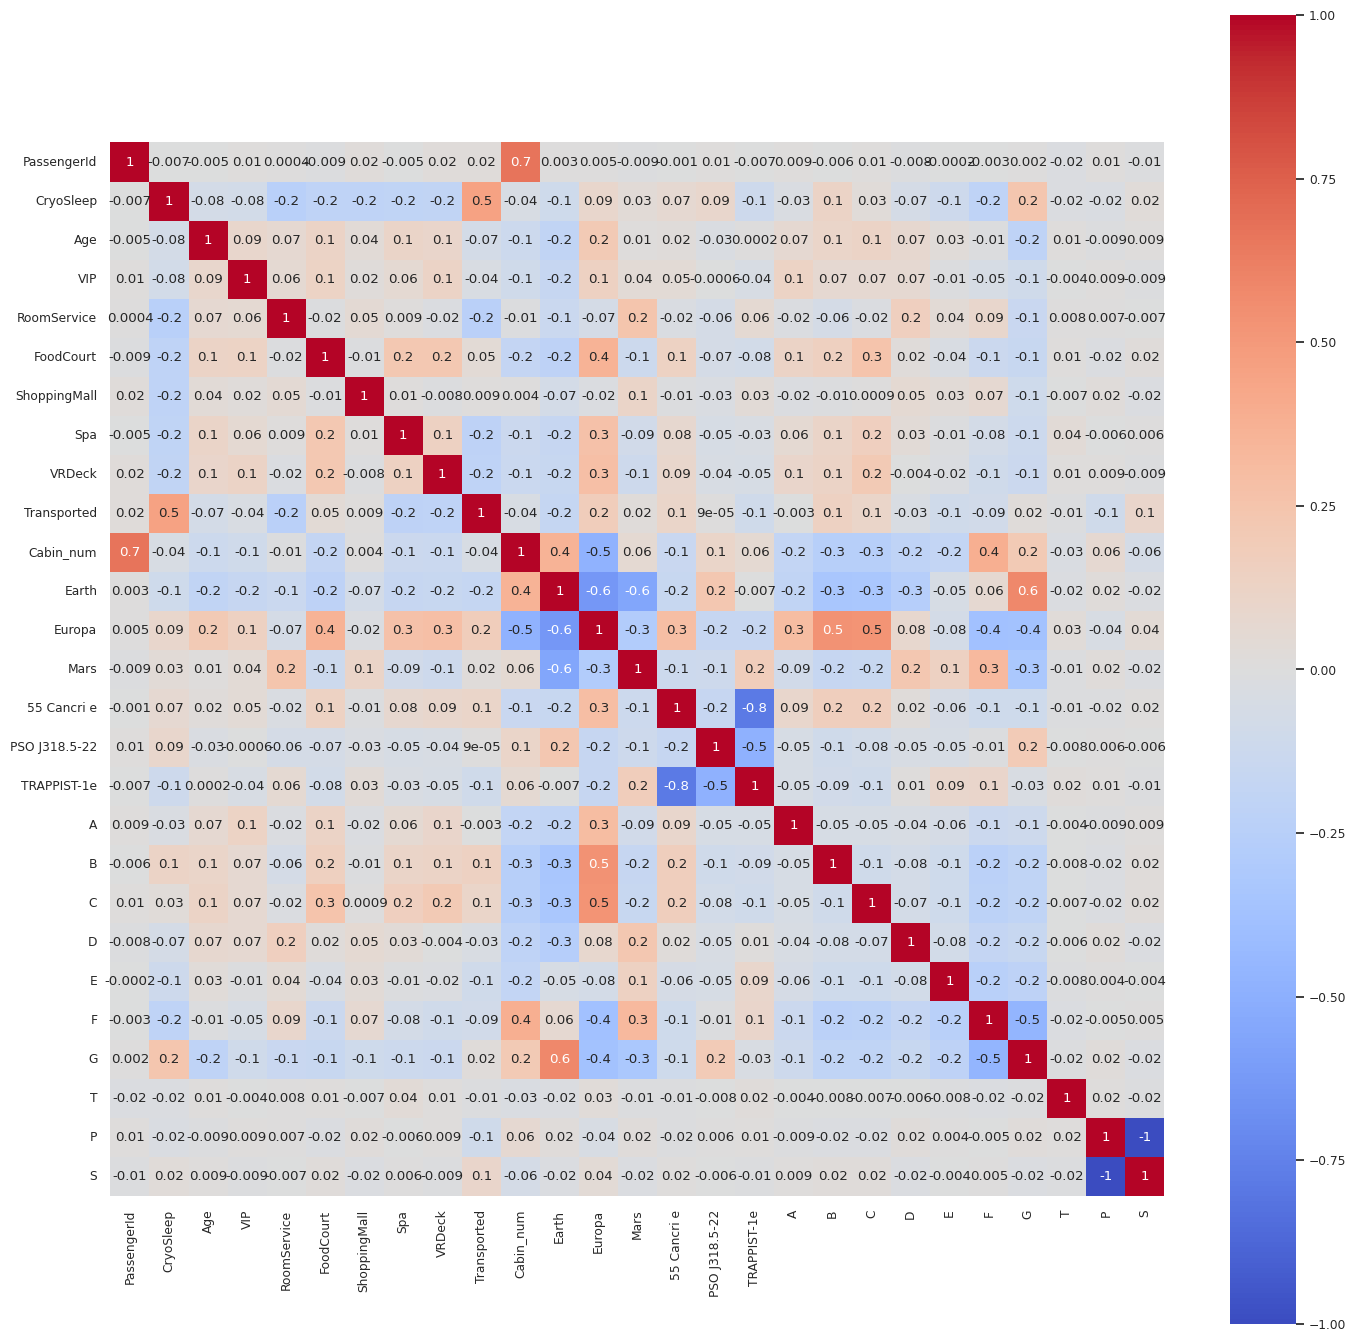

In [107]:
sns.set(font_scale=0.8)
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True,fmt='.1g' )
plt.show()

In [108]:
x = df.drop(['Transported','PassengerId'],axis=1).to_numpy()
y = df['Transported'].to_numpy()


In [27]:
###Hyper parameters

test_size = 0.25
hidden_layers = 64
activation_function = 'relu'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00006)
epochs = 4000
batchsize = 1024
dp_rate = 0.2


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size= test_size, random_state=6)
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.3, random_state=6)

In [29]:
x_train

array([[ 0., 25.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0., 40.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 0., 47.,  0., ...,  0.,  0.,  1.],
       [ 0., 46.,  0., ...,  0.,  1.,  0.],
       [ 0., 37.,  0., ...,  0.,  1.,  0.]])

In [30]:
x_valid

array([[ 1., 27.,  0., ...,  0.,  0.,  1.],
       [ 1.,  7.,  0., ...,  0.,  0.,  1.],
       [ 1., 72.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0., 29.,  0., ...,  0.,  1.,  0.],
       [ 0., 28.,  0., ...,  0.,  1.,  0.],
       [ 0., 37.,  0., ...,  0.,  0.,  1.]])

In [31]:
x_test

array([[ 0., 14.,  0., ...,  0.,  0.,  1.],
       [ 0., 48.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0., 25.,  0., ...,  0.,  1.,  0.],
       [ 0., 43.,  0., ...,  0.,  1.,  0.],
       [ 0., 44.,  1., ...,  0.,  0.,  1.]])

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

# 1. Prepare your data (X_train, y_train, X_test, y_test)

# 2. Build the model
model = tf.keras.Sequential([
    layers.BatchNormalization(synchronized=True),
    layers.Dense(hidden_layers, activation= activation_function),
    layers.Dropout(dp_rate),
    layers.BatchNormalization(synchronized=True),
    layers.Dense(hidden_layers, activation= activation_function),
    layers.Dropout(dp_rate),

    layers.Dense(1, activation='sigmoid')
])


early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.001,
    restore_best_weights=True,
)


# 3. Compile the model
model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

# 4. Train the model
history = model.fit(x_train, y_train, epochs= epochs, batch_size= batchsize, validation_data=(x_valid, y_valid), callbacks=[early_stopping], verbose= 0)

# 5. Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test MAE:', mae)

21/21 [==============================] - 0s 2ms/step - loss: 0.4035 - binary_accuracy: 0.8254
Test Loss: 0.40346112847328186
Test MAE: 0.825421154499054


Best Validation Loss: 0.4034
Best Validation Accuracy: 0.8054


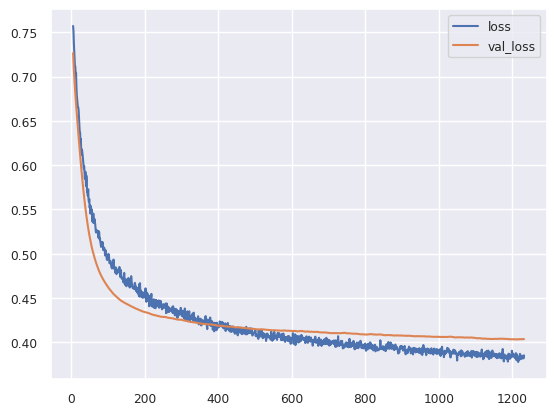

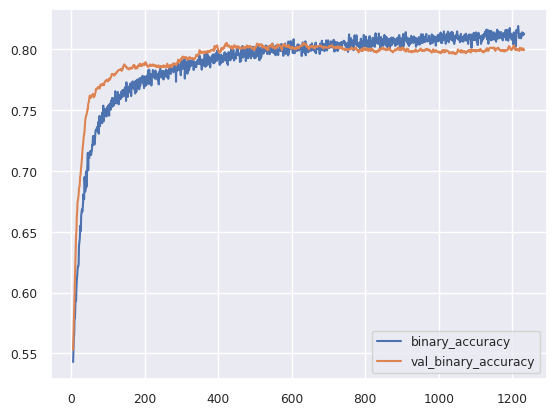

In [33]:

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [34]:
test_df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,...,A,B,C,D,E,F,G,T,P,S
0,1301.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1801.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1901.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2101.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2301.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,926602.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1496.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4273,926901.0,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4274,927101.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4275,927301.0,0.0,0.0,0.0,0.0,2680.0,0.0,0.0,523.0,297.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
test_df['Transported'] = model.predict(test_df.drop(['PassengerId'],axis = 1).to_numpy())

134/134 [==============================] - 0s 2ms/step


In [110]:
test_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,...,B,C,D,E,F,G,T,P,S,Transported
0,1301.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.364927
1,1801.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.014740
2,1901.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.999596
3,2101.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.998322
4,2301.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.421728


In [111]:
test_df.loc[test_df['Transported'] > 0.5, 'Transported'] = True
test_df.loc[test_df['Transported'] <= 0.5, 'Transported'] = False

In [81]:
test_df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,...,B,C,D,E,F,G,T,P,S,Transported
0,1301.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
1,1801.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
2,1901.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
3,2101.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
4,2301.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,926602.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1496.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True
4273,926901.0,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
4274,927101.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,True
4275,927301.0,0.0,0.0,0.0,0.0,2680.0,0.0,0.0,523.0,297.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,True


In [112]:
test_df['PassengerId'] = passenger_id_test
output = test_df[['PassengerId','Transported']]
output

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [113]:
output.to_csv('kaggle_submission.csv')

In [114]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(x_train, y_train)

    # Prediction
    predictions = models[key].predict(x_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [115]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.796325,0.825967,0.810298
Support Vector Machines,0.632466,0.486188,0.765217
Decision Trees,0.747320,0.770718,0.772853
Random Forest,0.807044,0.798343,0.845029
Naive Bayes,0.741194,0.903315,0.709328
K-Nearest Neighbor,0.781011,0.825967,0.788918
